<a href="https://colab.research.google.com/github/dimasepton/dumb-portfolio/blob/main/Notebook_Proyek_Akhir_Analisis_Data_Dimas_Septo_Nugroho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: "Bike Sharing"
- **Nama:** Dimas Septo Nugroho
- **Email:** dimasepto.nugroho@gmail.com
- **ID Dicoding:** dimasepton

## Menentukan Pertanyaan Bisnis

- Pada musim apa fasilitas Bike Sharing banyak digunakan oleh para pengguna?
- Pada pukul berapa para fasilitas Bike Sharing banyak digunakan oleh para pengguna?
- Bagaimana cara menentukan tarif sewa yang efektif untuk maintenance fasilitas?

## Import Semua Packages/Library yang Digunakan

In [1]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [3]:
# Memeriksa versi Library
print("Versi Pandas:", pd.__version__)
print("Versi NumPy:", np.__version__)
print("Versi Matplotlib:", matplotlib.__version__)
print("Versi Seaborn:", sns.__version__)
print("Versi Streamlit:", st.__version__)

Versi Pandas: 2.0.3
Versi NumPy: 1.25.2
Versi Matplotlib: 3.7.1
Versi Seaborn: 0.13.1
Versi Streamlit: 1.36.0


## Data Wrangling

### Gathering Data

In [25]:
pd.read_csv("hour.csv") # Membuat variabel data yang dianalisis menjadi "bike_hourly"

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [26]:
bike_hourly = pd.read_csv("hour.csv") # Memasukkan data kedalam variabel "bike_hourly"
print(bike_hourly) # Menampilkan data Bike Sharing per jam

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

### Assessing Data

In [27]:
# Mengubah tipe data pada kolom tanggal, season, yr, mnth, holiday, weekday, workingday, dan weathersit
bike_hourly["dteday"] = bike_hourly["dteday"].astype("datetime64[ns]")
bike_hourly["season"] = bike_hourly["season"].astype("str")
bike_hourly["yr"] = bike_hourly["yr"].astype("str")
bike_hourly["mnth"] = bike_hourly["mnth"].astype("str")
bike_hourly["holiday"] = bike_hourly["holiday"].astype("str")
bike_hourly["weekday"] = bike_hourly["weekday"].astype("str")
bike_hourly["workingday"] = bike_hourly["workingday"].astype("str")

In [9]:
# Memeriksa jumlah Duplicate Data
print("jumlah Duplicate Data:", bike_hourly.duplicated().sum())

jumlah Duplicate Data: 0


In [10]:
# Memeriksa jumlah Missing Value
print("jumlah Missing Value:", bike_hourly.isna().sum())

jumlah Missing Value: instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [28]:
# Memeriksa berbagai parameter statistik
bike_hourly.describe()

,instant,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [12]:
# Memeriksa tipe data pada setiap column
bike_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### Cleaning Data

In [ ]:
# Berdasarkan tahap Assessing Data, tidak ditemukan Data Kosong, Duplicate Data, Missing Value, Invalid Value, Inaccurate Value, dan Outlier.

## Exploratory Data Analysis (EDA)

In [29]:
# Rangkuman parameter statistik secara komprehensif
bike_hourly.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3,1,5,NaN,0,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Explore musim dengan penggunaan fasilitas Bike Sharing paling banyak oleh para pengguna?

In [14]:
bike_hourly.groupby(by="season").agg({
    "casual" : ["sum", "mean"],
"registered" : ["sum", "mean"],
    "cnt" : ["sum", "mean"],
}).sort_values(by=[("cnt", "sum")], ascending=False)

casual            registered                  cnt            
           sum       mean        sum        mean      sum        mean
season                                                               
3       226091  50.287144     835038  185.729093  1061129  236.016237
2       203522  46.160581     715067  162.183488   918589  208.344069
4       129782  30.666824     711831  168.202032   841613  198.868856
1        60622  14.290901     410726   96.823668   471348  111.114569

### Explore waktu dengan penggunaan fasilitas Bike Sharing paling banyak oleh para pengguna?

In [15]:
bike_hourly.groupby(by="hr").agg({
    "casual" : ["sum", "mean"],
    "registered" : ["sum", "mean"],
    "cnt" : ["sum", "mean"],
}).sort_values(by=[("cnt", "sum")], ascending=False)

casual            registered                 cnt            
      sum       mean        sum        mean     sum        mean
hr                                                             
17  54220  74.273973     282640  387.178082  336860  461.452055
18  44496  61.120879     265276  364.390110  309772  425.510989
8   15761  21.679505     245240  337.331499  261001  359.011004
16  53834  73.745205     173914  238.238356  227748  311.983562
19  35505  48.770604     191284  262.752747  226789  311.523352
13  52713  72.308642     132206  181.352538  184919  253.661180
12  49718  68.293956     134696  185.021978  184414  253.315934
15  54606  74.905350     128543  176.327846  183149  251.233196
14  55089  75.567901     120563  165.381344  175652  240.949246
20  26378  36.233516     138172  189.796703  164550  226.030220
9   22458  30.891334     136980  188.418157  159438  219.309491
7    8037  11.055021     146134  201.009629  154171  212.064649
11  43286  59.540578     108034  148.602476  151320  208.143054
10  33789  46.477304      92468  127.191197  126257  173.668501
21  20570  28.255495     104875  144.059066  125445  172.314560
22  16200  22.252747      79412  109.082418   95612  131.335165
23  11065  15.199176      52876   72.631868   63941   87.831044
6    3017   4.161379      52115   71.882759   55132   76.044138
0    7375  10.158402      31755   43.739669   39130   53.898072
1    4709   6.504144      19455   26.871547   24164   33.375691
2    3412   4.772028      12940   18.097902   16352   22.869930
5    1012   1.411437      13249   18.478382   14261   19.889819
3    1893   2.715925       6281    9.011478    8174   11.727403
4     874   1.253945       3554    5.098996    4428    6.352941

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa fasilitas Bike Sharing banyak digunakan oleh para pengguna?

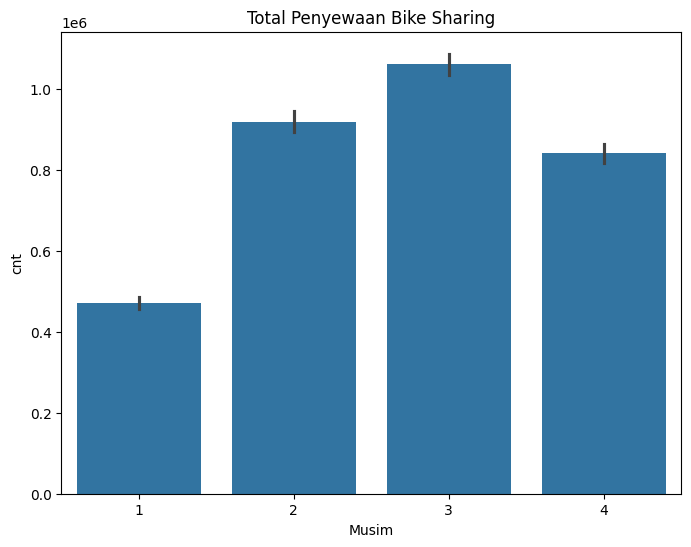

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x="season", y="cnt", data=bike_hourly, estimator=sum)
plt.title("Total Penyewaan Bike Sharing")
plt.xlabel("Musim")
plt.show()

### Pertanyaan 2: Pada pukul berapa para fasilitas Bike Sharing banyak digunakan oleh para pengguna?

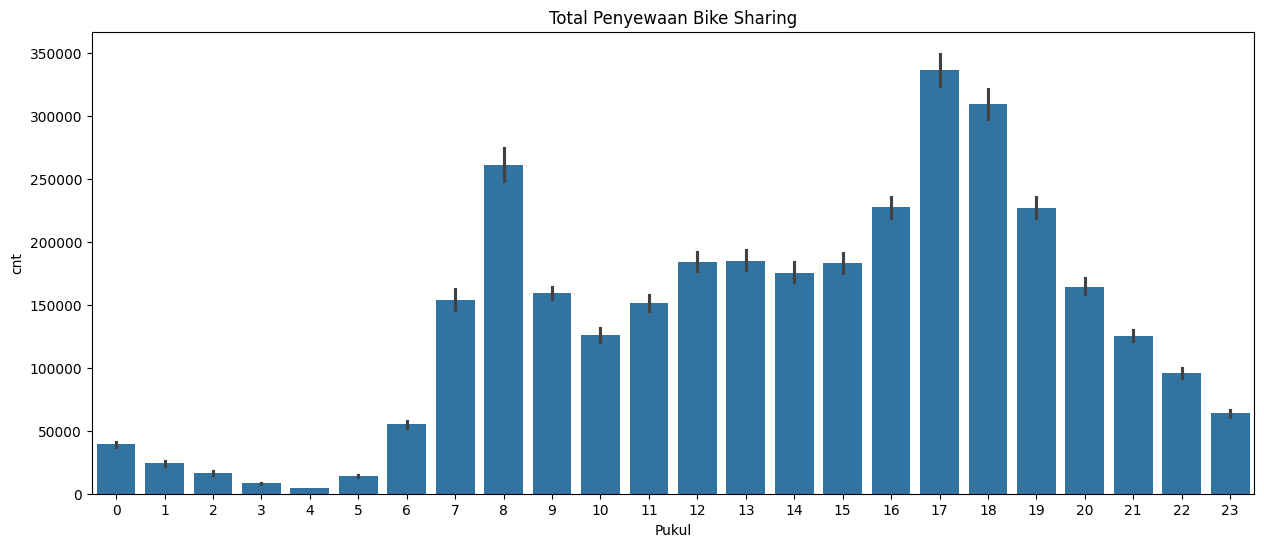

In [23]:
plt.figure(figsize=(15, 6))
sns.barplot(x="hr", y="cnt", data=bike_hourly, estimator=sum)
plt.title("Total Penyewaan Bike Sharing")
plt.xlabel("Pukul")
plt.show()

## Conclusion

- Berdasarkan data yang ada, para pengguna Bike Sharing lebih sering memanfaatkan fasilitas tersebut pada musim gugur (3: Fall), kemudian disusul musim panas (2: summer), musim dingin (4: winter), musim semi (1: springer). Dapat diperkirakan bahwa pada saat musim panas, banyak pengguna yang melakukan aktivitas di luar ruangan untuk menikmati liburan.
- Berdasarkan data yang ada, para pengguna Bike Sharing lebih sering memanfaatkan fasilitas tersebut pada pukul 17.00, kemudian disusul pukul 18.00, 08.00, 16.00, dan 19.00. Adapun waktu dengan jumlah penyewaan paling sedikit adalah pada pukul 04.00, 03.00, 05.00, 02.00, dan 01.00 alias waktu dini hari. Dapat diperkirakan bahwa para pengguna lebih banyak menggunakan fasilitas pada saat memulai aktivitas di pagi hari dan pada saat pulang beraktivitas di sore hari. Dan, pada waktu istirahat pada dini hari, penggunaan fasilitas sangat sedikit.
- Untuk mengoptimalkan maintenance, tarif sewa perlu dibedakan menyesuaikan demand. Misalnya, pada saat jumlah penggunaan/penyewaan meningkat, tarif sewa akan meningkat, serta sebaliknya apabila jumlah penggunaan/penyewaan menurun maka tarif sewa juga akan menurun. Selain itu perlu ada pembedaan tarif bagi casual user dan registered user, yang mana registered user tentu sedikit lebih murah. Hal tersebut sebagai upaya untuk meningkatkan profit agar developer dapat mempertahankan kualitas layanan. Namun, peningkatan atau penurunan tarif diberikan tidak secara drastis, sehingga pengguna masih tetap nyaman menggunakannya seiring dengan maintenance secara berkala yang dilakukan secara optimal. ramai-tidaknya penggunaan Bike Sharing akan dinilai berdasarkan musim dan juga waktu per jamnya, sehingga tarif akan otomatis menyesuaikan berdasarkan algoritma yang ada.